In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

folder_path = './idling'
files = [f for f in os.listdir(folder_path) if f.endswith('.csv')] 

dataframes = [] 

for file in files:
    df = pd.read_csv(os.path.join(folder_path, file)) 
    dataframes.append(df) 

combined_df_idling = pd.concat(dataframes, ignore_index=True)


In [3]:
combined_df_idling['START'] = pd.to_datetime(combined_df_idling['START'])
combined_df_idling['END'] = pd.to_datetime(combined_df_idling['END'])

# Calculate the idling duration in minutes
combined_df_idling['IDLE_DURATION'] = (combined_df_idling['END'] - combined_df_idling['START']).dt.total_seconds() / 60

# Group by month and calculate total idling time
combined_df_idling['Month'] = combined_df_idling['START'].dt.month  # Extract month
monthly_idling = combined_df_idling.groupby('Month')['IDLE_DURATION'].sum()

print(monthly_idling)


Month
1      389193.0
2      425089.0
3      572337.0
4      693672.0
5     1109721.0
6     1257070.0
7     1356586.0
8     1354416.0
9     1129895.0
10     923525.0
11     639221.0
12     424876.0
Name: IDLE_DURATION, dtype: float64


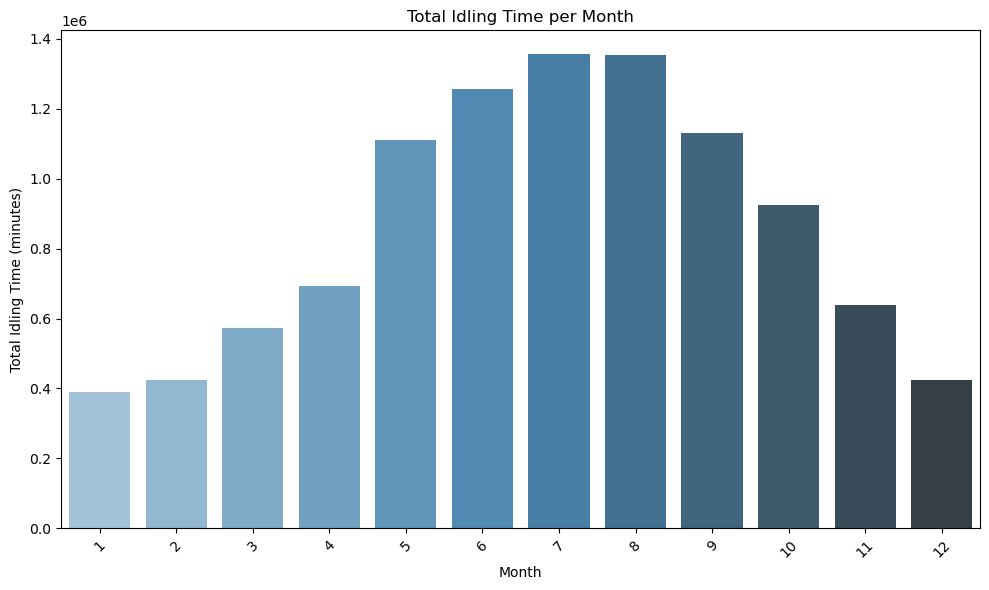

In [4]:
import seaborn as sns

monthly_idling_df = monthly_idling.reset_index()
monthly_idling_df.columns = ['Month', 'Total Idling Time']

# Plot with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Total Idling Time', data=monthly_idling_df, palette='Blues_d')

plt.title('Total Idling Time per Month')
plt.xlabel('Month')
plt.ylabel('Total Idling Time (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


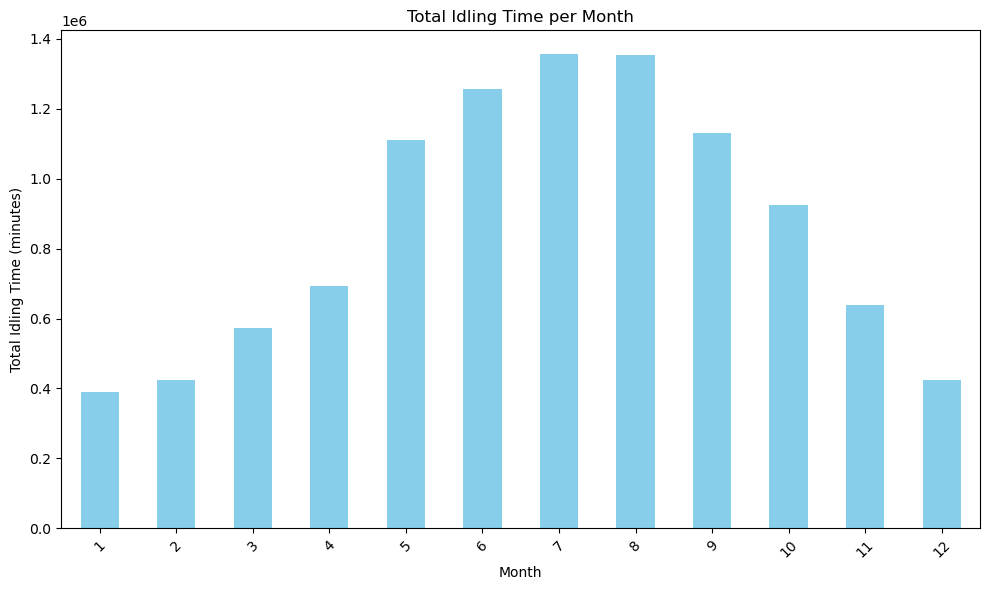

In [5]:
plt.figure(figsize=(10, 6))
monthly_idling.plot(kind='bar', color='skyblue')

plt.title('Total Idling Time per Month')
plt.xlabel('Month')
plt.ylabel('Total Idling Time (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_1352\1811573260.py:10: DtypeWarning: Columns (23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(folder_path, file))
C:\Users\User\AppData\Local\Temp\ipykernel_1352\1811573260.py:10: DtypeWarning: Columns (23,24,25,26,27,28,29,30,31,32,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(folder_path, file))
C:\Users\User\AppData\Local\Temp\ipykernel_1352\1811573260.py:10: DtypeWarning: Columns (23,24,25,26,27,28,29,30,31,32,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(folder_path, file))
C:\Users\User\AppData\Local\Temp\ipykernel_1352\1811573260.py:10: DtypeWarning: Columns (23,24,25,26,27,28,29,30,31,32,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path

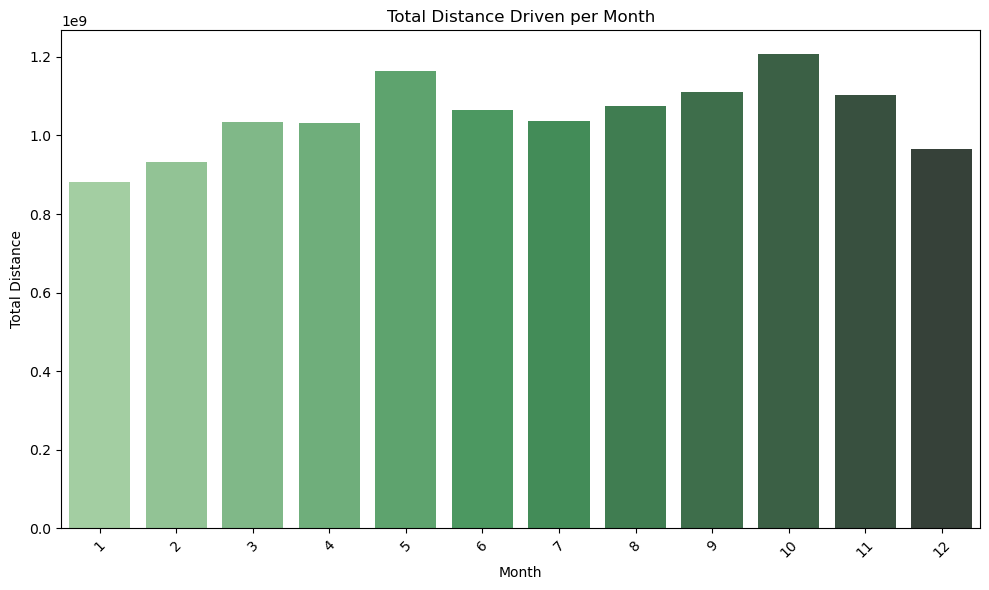

In [6]:
folder_path = './driving'

files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

dataframes = []

for file in files:
    df = pd.read_csv(os.path.join(folder_path, file))
    dataframes.append(df)

combined_df_driving = pd.concat(dataframes, ignore_index=True)

# Convert 'START' and 'END' columns to datetime
combined_df_driving['START'] = pd.to_datetime(combined_df_driving['START'])
combined_df_driving['END'] = pd.to_datetime(combined_df_driving['END'])

# Group by month and sum the distance traveled
combined_df_driving['Month'] = combined_df_driving['START'].dt.month  # Extract month from START time
monthly_distance = combined_df_driving.groupby('Month')['DISTANCE'].sum()  # Sum distance by month



monthly_distance_df = monthly_distance.reset_index()
monthly_distance_df.columns = ['Month', 'Total Distance']

plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Total Distance', data=monthly_distance_df, palette='Greens_d')

plt.title('Total Distance Driven per Month')
plt.xlabel('Month')
plt.ylabel('Total Distance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


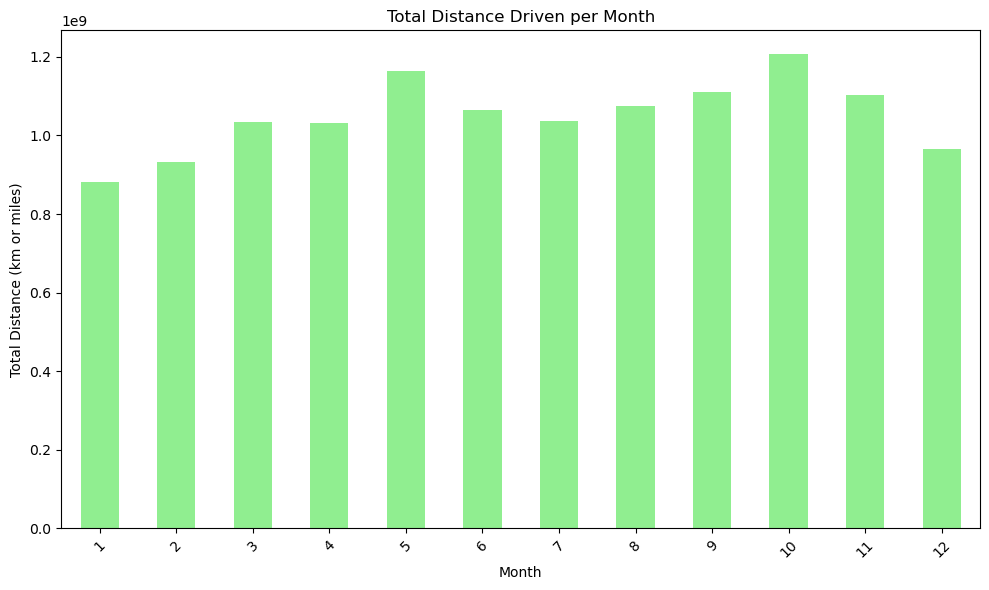

In [8]:
# # Plotting with Matplotlib
plt.figure(figsize=(10, 6))
monthly_distance.plot(kind='bar', color='lightgreen') 

plt.title('Total Distance Driven per Month')
plt.xlabel('Month')
plt.ylabel('Total Distance (km or miles)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Date
2023-12-31      517.0
2024-01-01     9613.0
2024-01-02    14370.0
2024-01-03    12850.0
2024-01-04    12596.0
               ...   
2024-12-27    13669.0
2024-12-28    16097.0
2024-12-29    10687.0
2024-12-30    16018.0
2024-12-31    10954.0
Name: IDLE_DURATION, Length: 367, dtype: float64


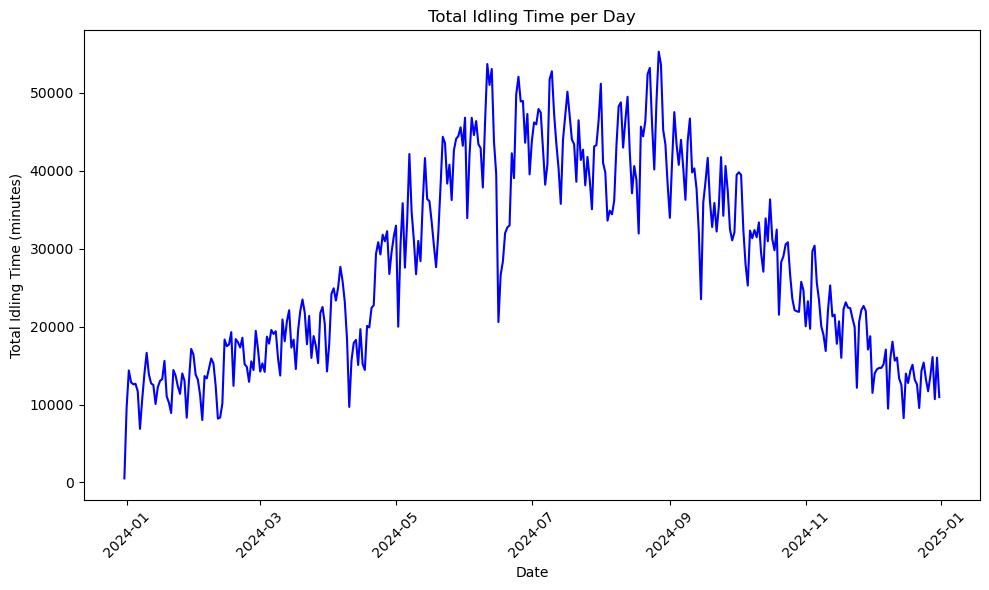

In [6]:
combined_df_idling['Date'] = combined_df_idling['START'].dt.date 
daily_idling = combined_df_idling.groupby('Date')['IDLE_DURATION'].sum()

# Plotting with Matplotlib (Line graph)
plt.figure(figsize=(10, 6))
daily_idling.plot(kind='line', color='blue')  

plt.title('Total Idling Time per Day')
plt.xlabel('Date')
plt.ylabel('Total Idling Time (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()

print(daily_idling)
plt.show()


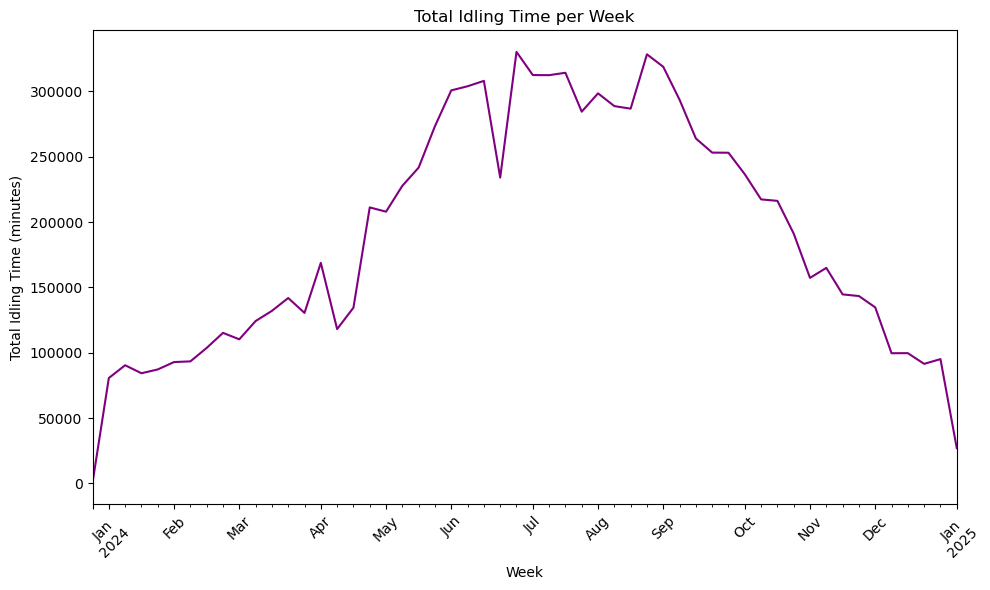

In [7]:
combined_df_idling['Week'] = combined_df_idling['START'].dt.to_period('W')  # Group by week

# Sum the idling time for each week
weekly_idling = combined_df_idling.groupby('Week')['IDLE_DURATION'].sum()

plt.figure(figsize=(10, 6))
weekly_idling.plot(kind='line', color='purple') 

plt.title('Total Idling Time per Week')
plt.xlabel('Week')
plt.ylabel('Total Idling Time (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [33]:
!pip install folium


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
folder_path = './parked'
files = [f for f in os.listdir(folder_path) if f.endswith('.csv')] 

dataframes = []  

for file in files:
    df = pd.read_csv(os.path.join(folder_path, file)) 
    dataframes.append(df) 

combined_df_parked = pd.concat(dataframes, ignore_index=True)

combined_df_parked['START'] = pd.to_datetime(combined_df_parked['START'])
combined_df_parked['END'] = pd.to_datetime(combined_df_parked['END'])


In [18]:
combined_df = pd.concat([combined_df_parked[['LAT', 'LONG', 'UNIT_ID']], 
                         combined_df_idling[['LAT', 'LONG', 'UNIT_ID']]], 
                        ignore_index=True)

In [50]:
import folium

# Center map on the average lat/lon
map_center = [combined_df['LAT'].mean(), combined_df['LONG'].mean()]
my_map = folium.Map(location=map_center, zoom_start=12)  # Adjust zoom level as needed

from folium.plugins import HeatMap

# Prepare the data for the heatmap
heat_data = [[row['LAT'], row['LONG']] for index, row in combined_df.iterrows()]

# Add heatmap to the map
HeatMap(heat_data).add_to(my_map)
my_map.save('vehicle_behavior_map.html')

In [19]:
copy_df_idling = combined_df_idling.copy()
daily_idling = copy_df_idling.groupby('Date')['IDLE_DURATION'].sum().reset_index()
daily_idling.rename(columns={'Date': 'ds', 'IDLE_DURATION': 'y'}, inplace=True)
daily_idling['ds'] = pd.to_datetime(daily_idling['ds'], format='%Y-%m')


10:22:36 - cmdstanpy - INFO - Chain [1] start processing
10:22:36 - cmdstanpy - INFO - Chain [1] done processing


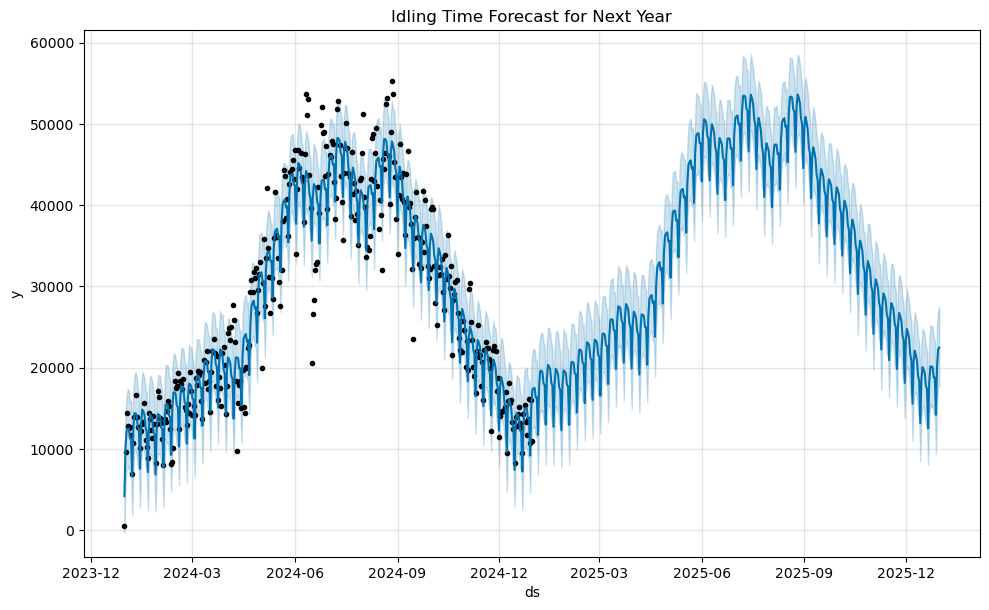

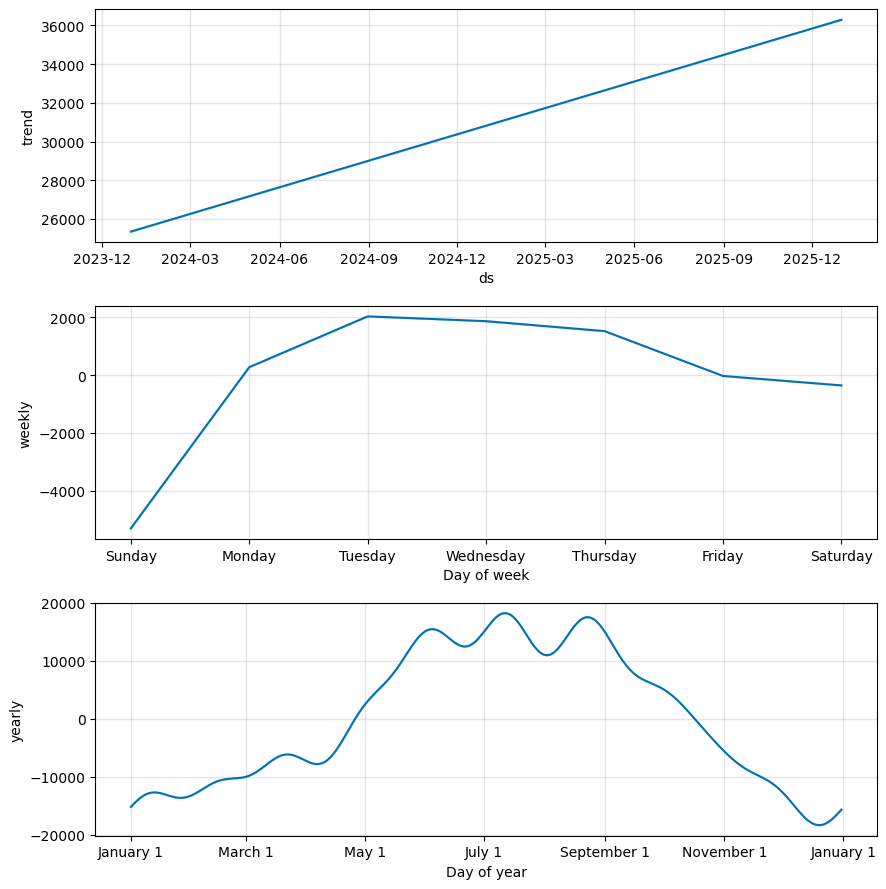

In [12]:
from prophet import Prophet

m = Prophet(yearly_seasonality=10)  # Tells Prophet to be aggressive with yearly trends


m.fit(daily_idling)  


future = m.make_future_dataframe(periods=365)

# Make predictions
forecast = m.predict(future)

# Plot the forecast
fig1 = m.plot(forecast)
plt.title("Idling Time Forecast for Next Year")
plt.show()

# Plot forecast components (trend, seasonality, etc.)
fig2 = m.plot_components(forecast)
plt.show()

In [15]:
copy_df_idling = combined_df_idling.copy()

copy_df_idling['START'] = pd.to_datetime(copy_df_idling['START'])

# Extract Year-Month (to group by month)
copy_df_idling['YearMonth'] = copy_df_idling['START'].dt.to_period('M')

# Group by Month and Sum Idling Duration
monthly_idling = copy_df_idling.groupby('YearMonth')['IDLE_DURATION'].sum().reset_index()

monthly_idling['ds'] = monthly_idling['YearMonth'].astype(str)  # Convert period to string
monthly_idling['ds'] = pd.to_datetime(monthly_idling['ds'])  # Convert to datetime

monthly_idling.rename(columns={'IDLE_DURATION': 'y'}, inplace=True)

print(monthly_idling.head())



  YearMonth         y         ds
0   2023-12     517.0 2023-12-01
1   2024-01  389193.0 2024-01-01
2   2024-02  425089.0 2024-02-01
3   2024-03  572337.0 2024-03-01
4   2024-04  693672.0 2024-04-01


10:45:50 - cmdstanpy - INFO - Chain [1] start processing
10:45:50 - cmdstanpy - INFO - Chain [1] done processing


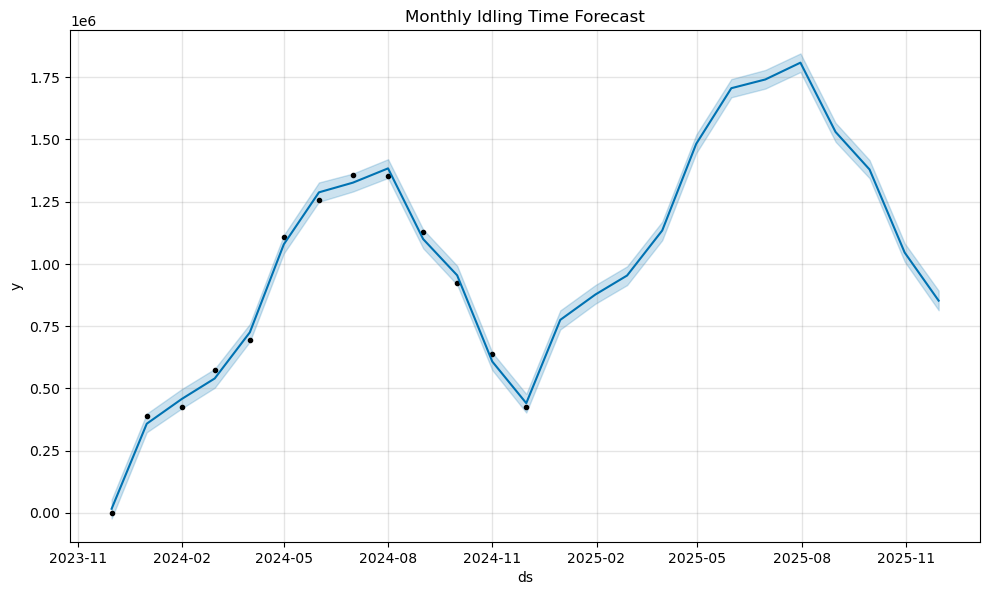

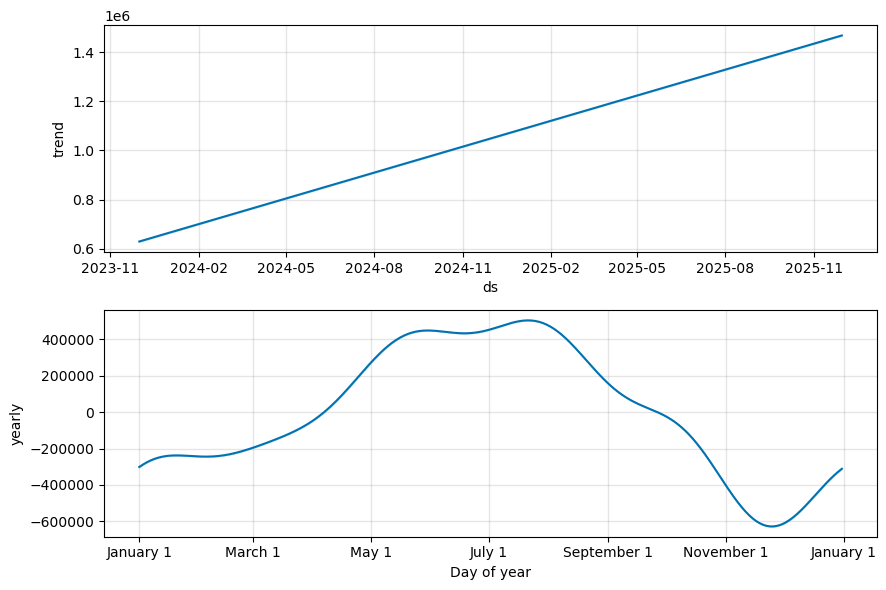

In [23]:
from prophet import Prophet

m = Prophet(yearly_seasonality=5, changepoint_prior_scale=0.05)
m.fit(monthly_idling)

future = m.make_future_dataframe(periods=12, freq='M')  # 'M' = Monthly

forecast = m.predict(future)

fig1 = m.plot(forecast)
plt.title("Monthly Idling Time Forecast")
plt.show()

fig2 = m.plot_components(forecast)
plt.show()